<a href="https://colab.research.google.com/github/ManjunathD620/Image_classification_using_CNN/blob/main/Cifar10_CNN_Image_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
img_model = models.Sequential([
                               layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),

                               layers.Flatten(),
                               layers.Dense(100,activation='relu'),
                               layers.Dense(10,activation='softmax')
                               
])



In [8]:
img_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
img_model.fit(x_train, y_train, epochs=8,batch_size=200)

Epoch 1/8
250/250 [==============================] - 72s 285ms/step - loss: 1.7577 - accuracy: 0.3544
Epoch 2/8
250/250 [==============================] - 68s 272ms/step - loss: 1.3835 - accuracy: 0.5031
Epoch 3/8
250/250 [==============================] - 68s 271ms/step - loss: 1.2555 - accuracy: 0.5534
Epoch 4/8
250/250 [==============================] - 67s 270ms/step - loss: 1.1685 - accuracy: 0.5894
Epoch 5/8
250/250 [==============================] - 67s 270ms/step - loss: 1.0930 - accuracy: 0.6152
Epoch 6/8
250/250 [==============================] - 67s 269ms/step - loss: 1.0383 - accuracy: 0.6367
Epoch 7/8
250/250 [==============================] - 67s 270ms/step - loss: 0.9863 - accuracy: 0.6578
Epoch 8/8
250/250 [==============================] - 67s 269ms/step - loss: 0.9411 - accuracy: 0.6729


In [10]:
img_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9796 - accuracy: 0.6606


[0.9796373844146729, 0.6606000065803528]

Predicted : bird


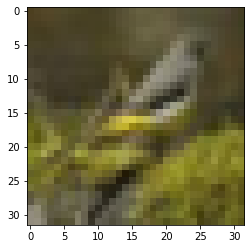

In [11]:
import random
import numpy as np
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
rand = random.randint(0,x_test.shape[0])
subject = x_test[rand]
plt.imshow(subject)
subject = np.expand_dims(subject,axis=0)
prediction = img_model.predict(subject)
print("Predicted : "+labels[np.argmax(prediction)])